In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DEMO_URL = 'http://ctgan-data.s3.amazonaws.com/census.csv.gz'
df = pd.read_csv(DEMO_URL, compression='gzip')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [6]:
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

In [7]:
def plot_hist(data, column, num_bins=50):
    idxs = list(data.keys())
    fig, axes = plt.subplots(nrows=1, ncols=len(idxs), figsize=(6*len(idxs), 6))
    fig.suptitle(column)
    for i in range(len(idxs)):
        idx = idxs[i]
        axes[i].set_title(idx)
        if data[idx][column].dtype == 'O':
            data[idx][column].value_counts().plot(kind='bar', ax=axes[i])
        else:
            data[idx][column].plot(kind='hist', ax=axes[i], bins=num_bins)

In [8]:
df_torch = pd.read_csv('torch.csv')
df_tf = pd.read_csv('tensorflow.csv')

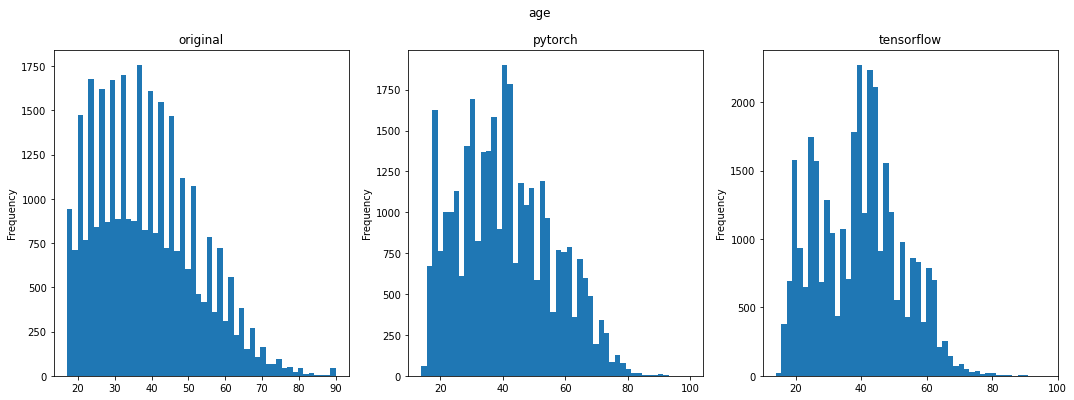

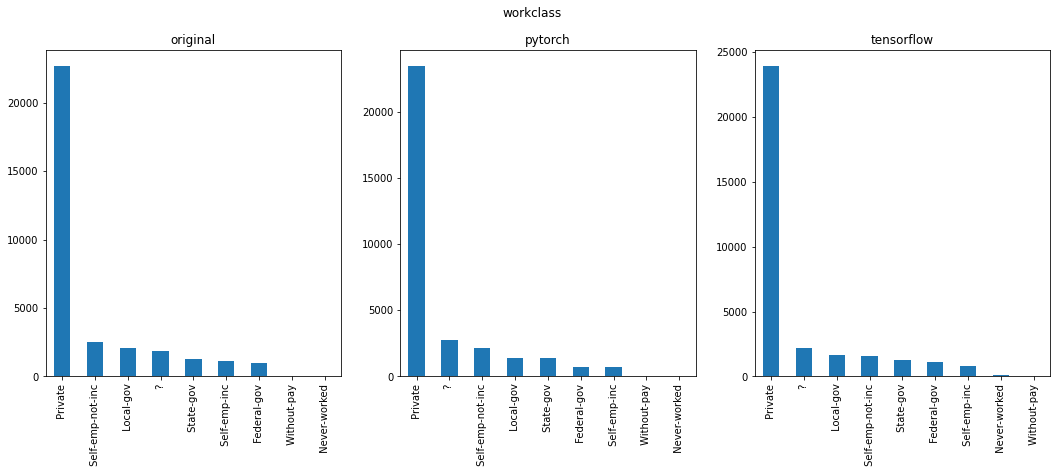

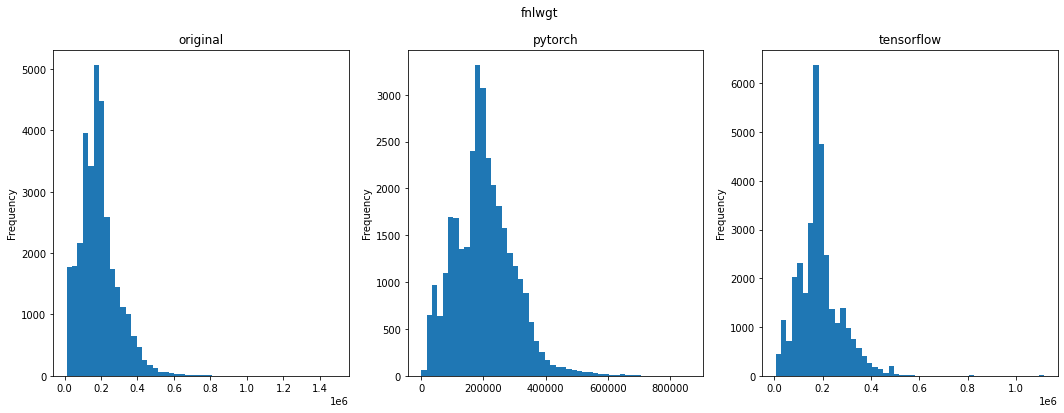

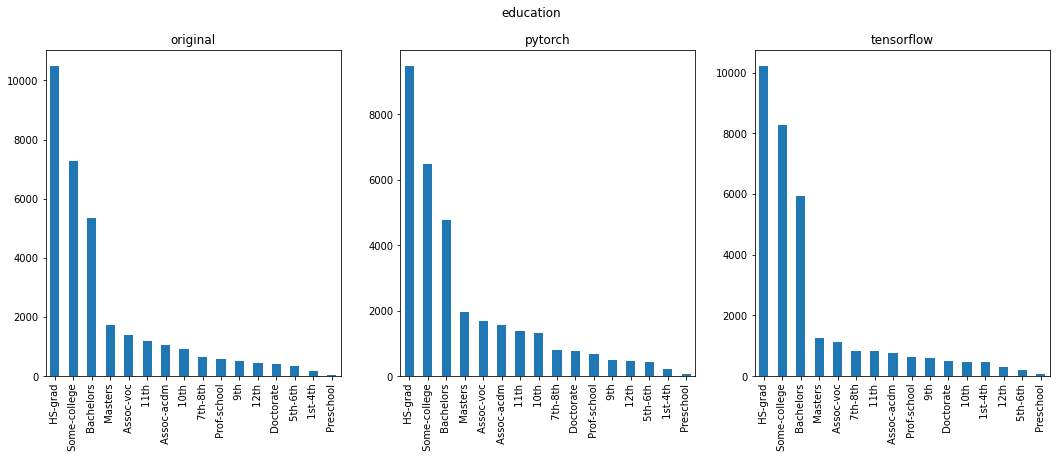

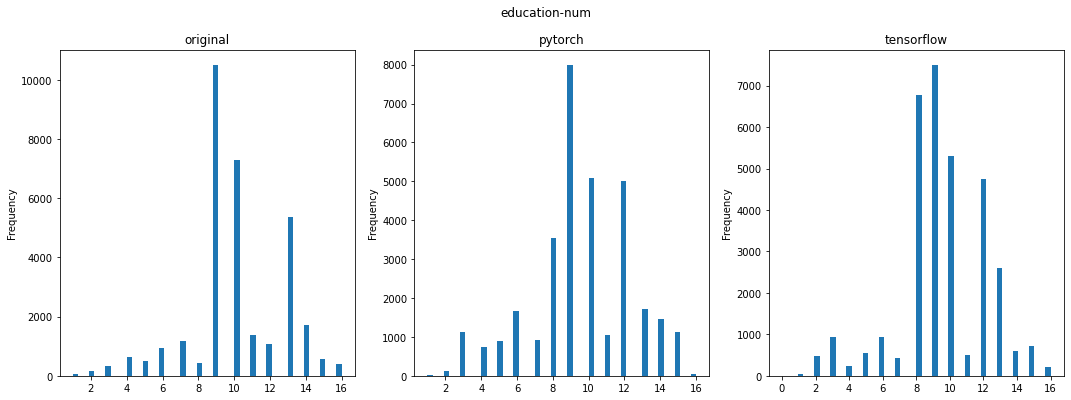

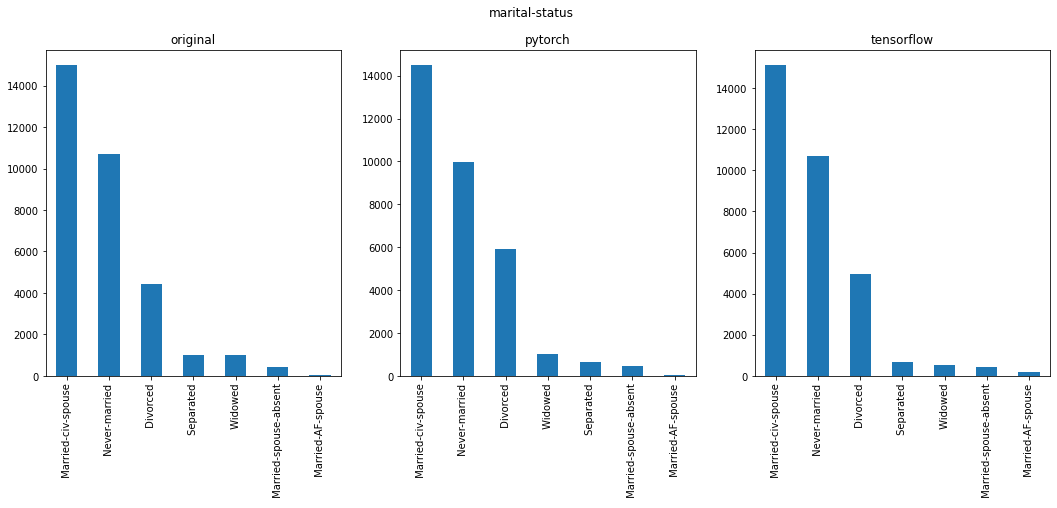

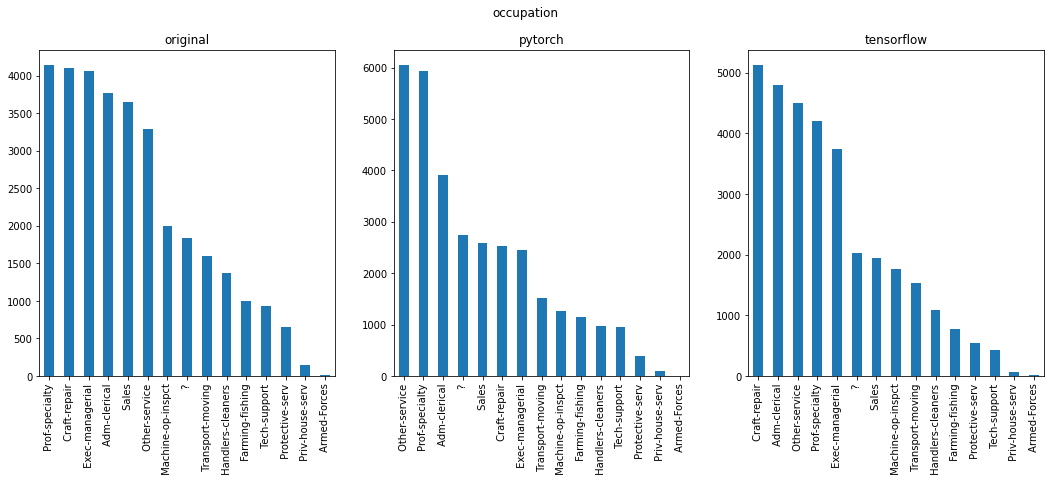

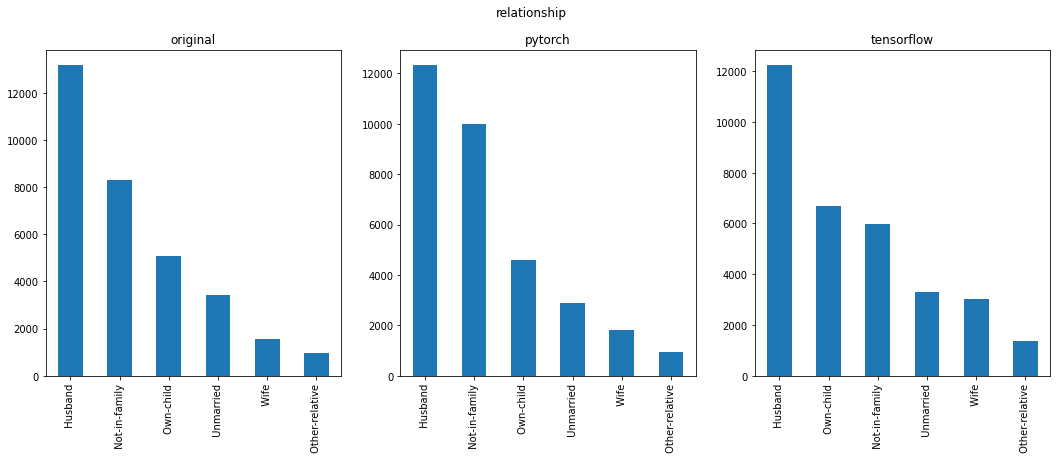

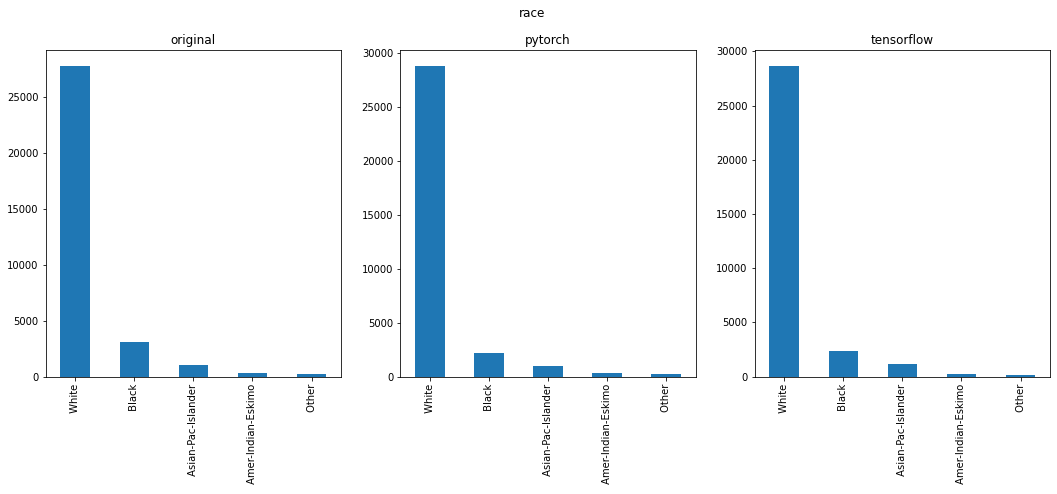

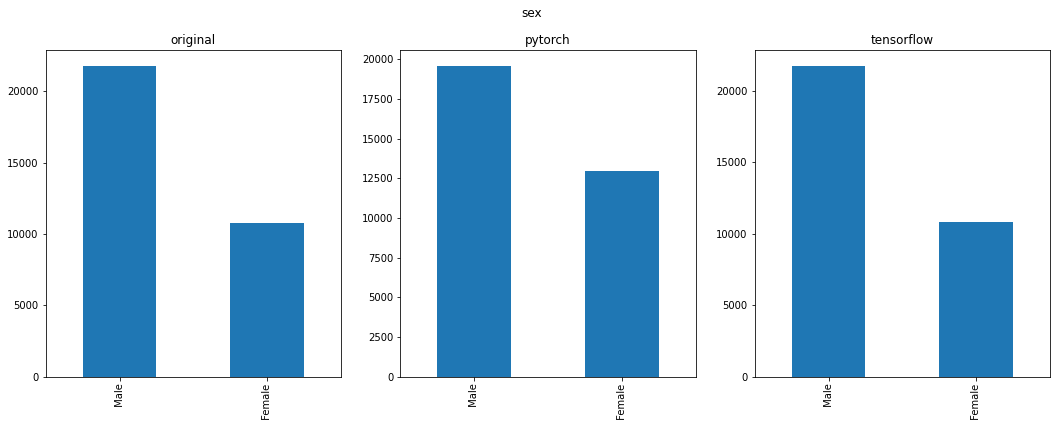

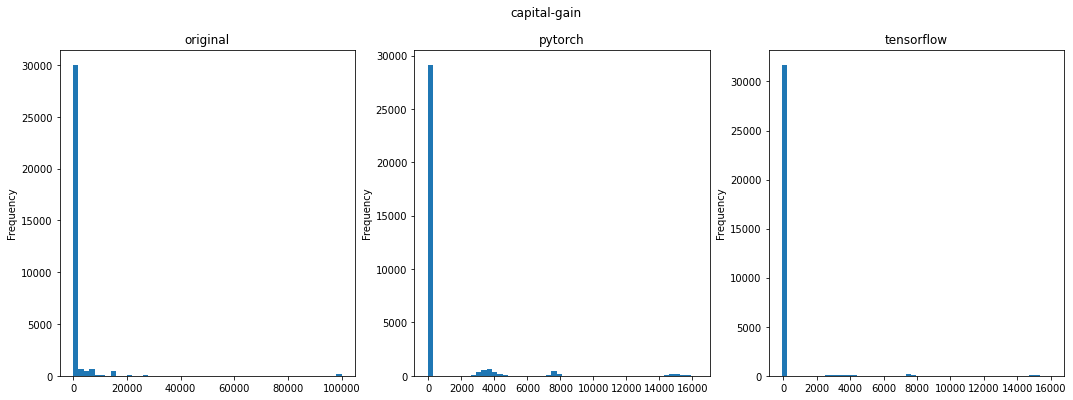

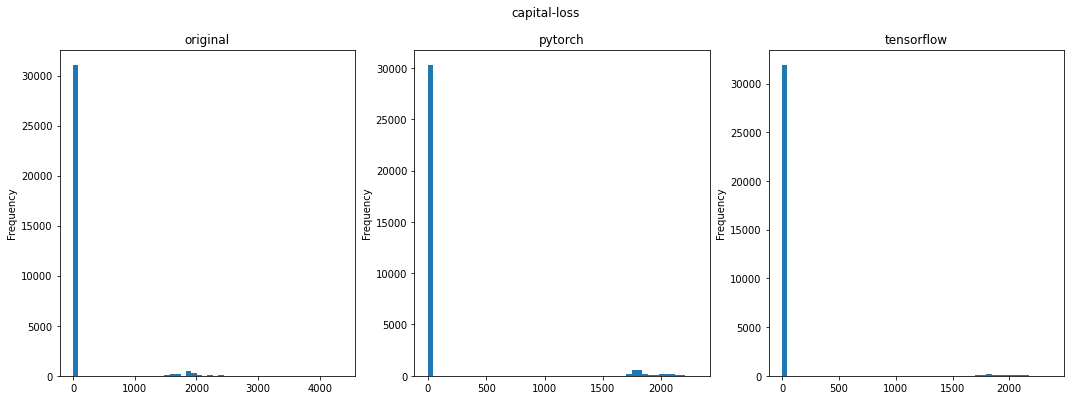

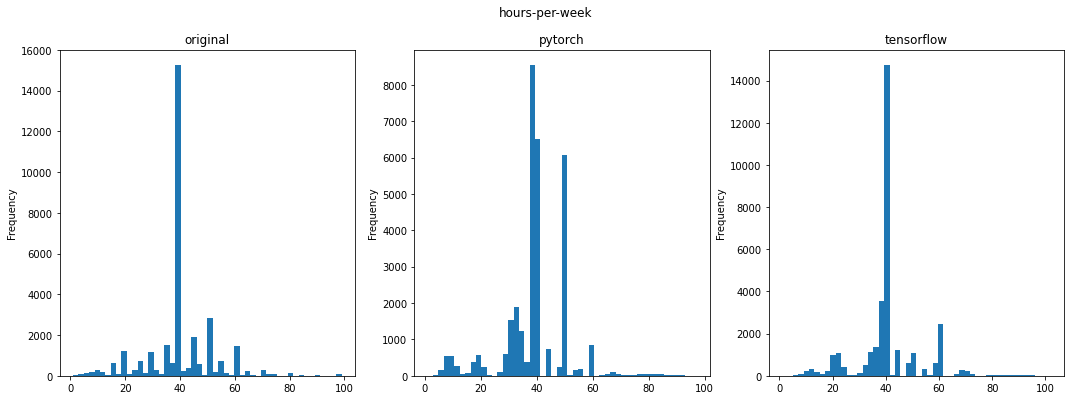

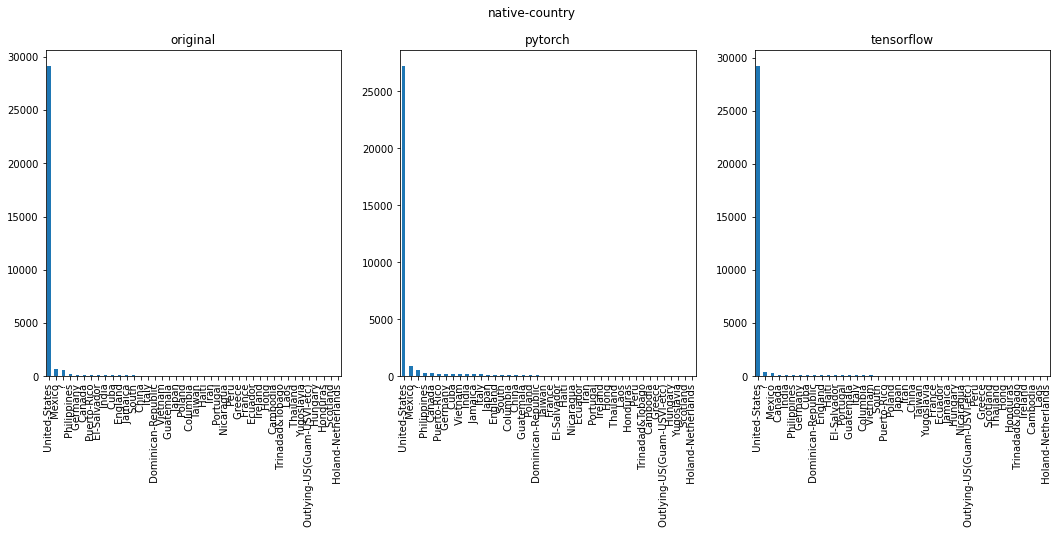

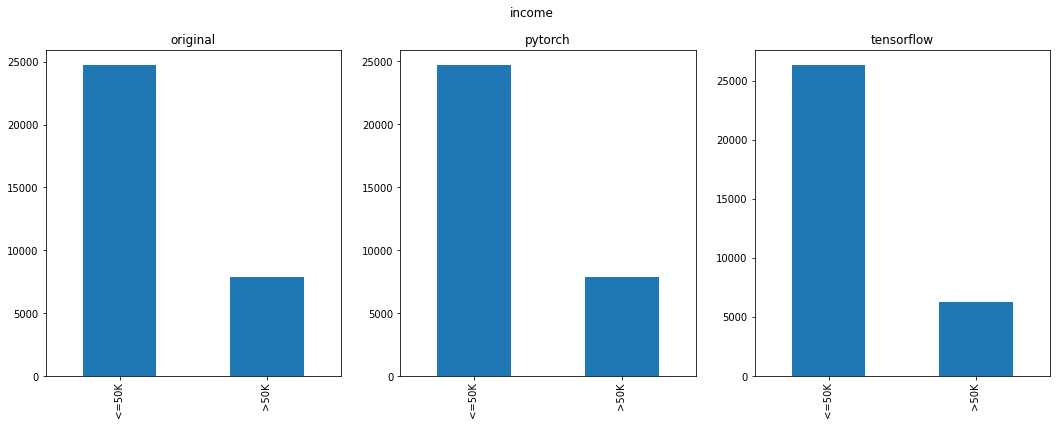

In [9]:
data = {'original': df, 'pytorch': df_torch, 'tensorflow': df_tf}
for c in df.columns:
    plot_hist(data, c)